<a href="https://colab.research.google.com/github/Hafizur-Rahman-SD/ML-with-Python-FCC-Course-/blob/main/CCat_and_Dog_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 1: Import Libraries

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import os

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [ ]:
#  Cell 2: Download and Extract Dataset Properly

import zipfile
import os
import tensorflow as tf

_URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
path_to_zip = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL)

#  Extract manually
with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    zip_ref.extractall(os.path.dirname(path_to_zip))

#  Set paths
base_dir = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

#  Check if directories exist
print("Base directory:", base_dir)
print("Train directory:", train_dir)
print("Validation directory:", validation_dir)

#  Verify dataset
print("Train cats:", len(os.listdir(os.path.join(train_dir, 'cats'))))
print("Train dogs:", len(os.listdir(os.path.join(train_dir, 'dogs'))))
print("Validation cats:", len(os.listdir(os.path.join(validation_dir, 'cats'))))
print("Validation dogs:", len(os.listdir(os.path.join(validation_dir, 'dogs'))))


Base directory: /root/.keras/datasets/cats_and_dogs_filtered
Train directory: /root/.keras/datasets/cats_and_dogs_filtered/train
Validation directory: /root/.keras/datasets/cats_and_dogs_filtered/validation
Train cats: 1000
Train dogs: 1000
Validation cats: 500
Validation dogs: 500


In [ ]:
# Cell 3: Create Image Generators

IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

train_image_gen = ImageDataGenerator(rescale=1./255)
validation_image_gen = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_gen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_data_gen = validation_image_gen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


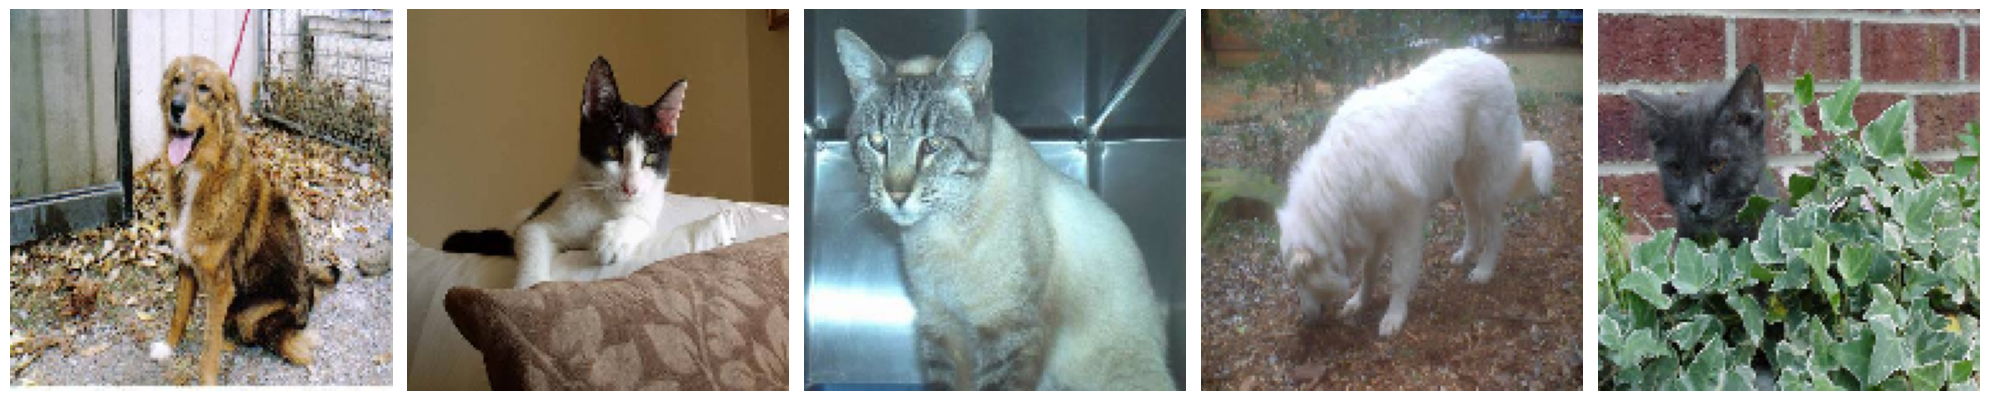

In [ ]:
# Cell 4: Show some training images

sample_training_images, _ = next(train_data_gen)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:5])


In [ ]:
# Cell 5: Data Augmentation to improve accuracy

train_image_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data_gen = train_image_gen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.


In [ ]:
# Cell 6: Build a powerful CNN model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Cell 7: Train the model

EPOCHS = 30

history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=val_data_gen.samples // BATCH_SIZE
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.5137 - loss: 0.6942 - val_accuracy: 0.6119 - val_loss: 0.6594
Epoch 2/30
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1:25 1s/step - accuracy: 0.5625 - loss: 0.6653

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 22s 331ms/step - accuracy: 0.5625 - loss: 0.6653 - val_accuracy: 0.6099 - val_loss: 0.6617
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.5736 - loss: 0.6770 - val_accuracy: 0.5474 - val_loss: 0.6806
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 39s 585ms/step - accuracy: 0.4062 - loss: 0.7032 - val_accuracy: 0.5444 - val_loss: 0.6816
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.5373 - loss: 0.6887 - val_accuracy: 0.5837 - val_loss: 0.6514
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 17s 253ms/step - accuracy: 0.6562 - loss: 0.6595 - val_accuracy: 0.5887 - val_loss: 0.6507
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.5591 - loss: 0.6694 - val_accuracy: 0.5907 - val_loss: 0.6562
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 18s 252ms/step - accuracy: 0.5938 - loss: 0.6830 - val_accuracy: 0.6139 - val_loss: 0.6519
Epoch 9/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.6041 - loss: 0.6563 - val_accuracy: 0.6321 - val_

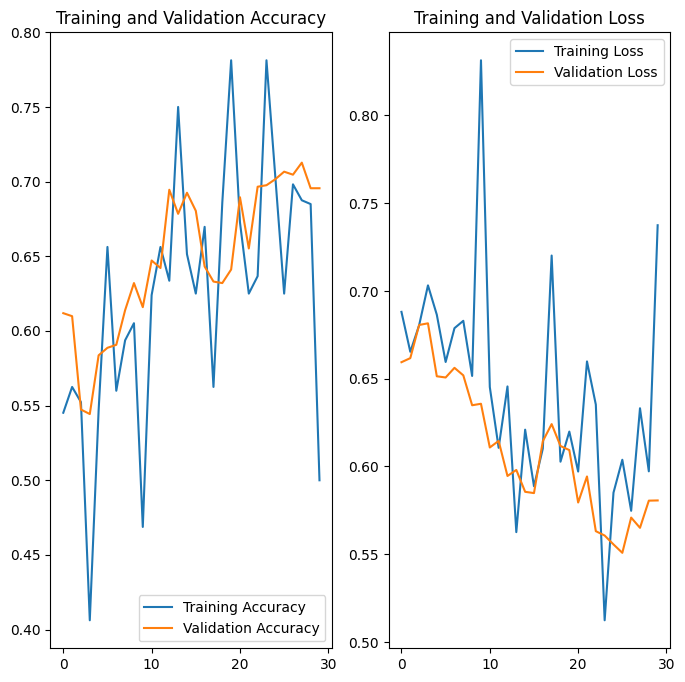

In [ ]:
# Cell 8: Plot accuracy and loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


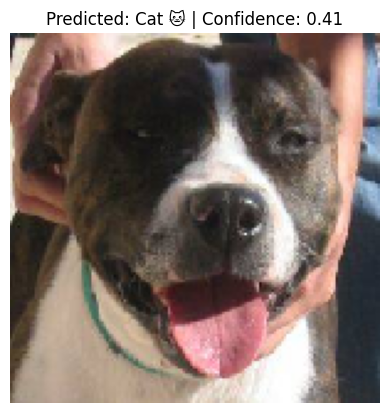

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


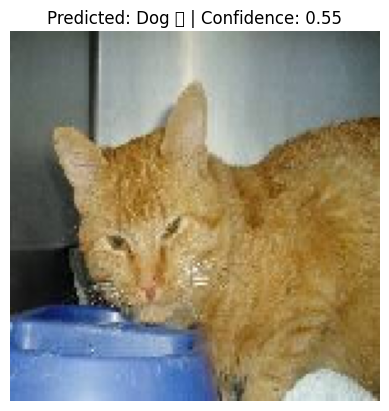

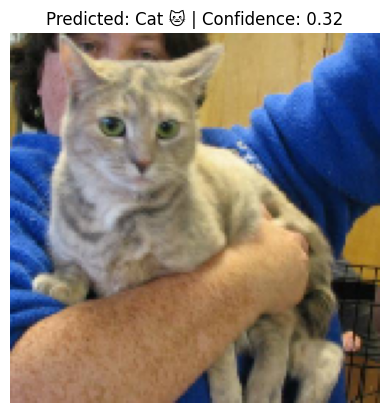

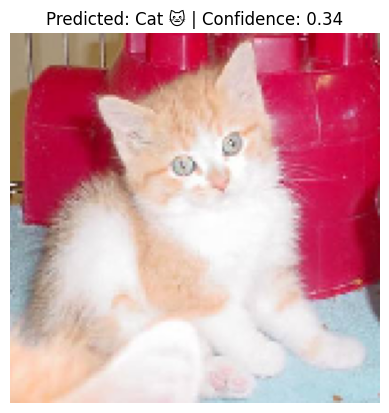

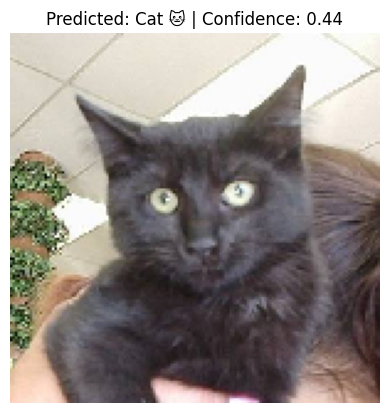

In [ ]:
# Cell 9: Test on validation images

val_images, val_labels = next(val_data_gen)
predictions = model.predict(val_images)

for i in range(5):
    plt.imshow(val_images[i])
    label = "Dog 🐶" if predictions[i] > 0.5 else "Cat 🐱"
    plt.title(f"Predicted: {label} | Confidence: {predictions[i][0]:.2f}")
    plt.axis('off')
    plt.show()
